In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt  # to plot
from scipy.optimize import minimize
random.seed(5)

In [2]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    y = 500 - (20*x1) - (26*x2) - (4*x1*x2) + (4*x1*x1) + (3*x2*x2)
    return y


/tmp/ipykernel_27590/2581037447.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


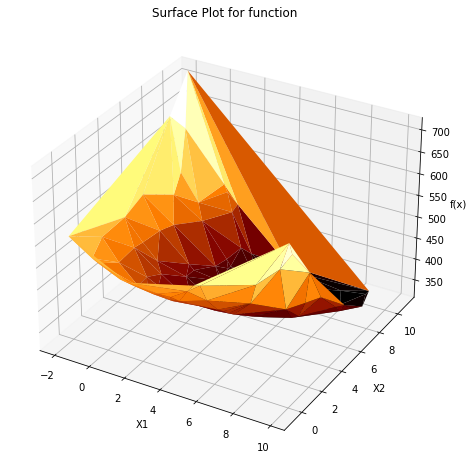

In [4]:
x1 = np.array([random.uniform(-2,10) for _ in range(100)])
x2 = np.array([random.uniform(-1,11) for _ in range(100)])
X = np.array([x1,x2])
z = f(X)
fig = plt.figure(figsize= (25,8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(x1, x2, z, cmap=plt.cm.afmhot, linewidth=0.2)
ax.set_title('Surface Plot for function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel("f(x)")
plt.show()

In [17]:
def simulated_annealing(xo,Tin, maxiter = 100000):
    f1 = f(xo)
    func = [f1]
    x_1 = [xo[0]]
    x_2 = [xo[1]]
    i = 0
    iterations = [i]
    c = 1
    while c >0.0001 and i<maxiter:
            u1 = random.uniform(0,1)
            u2 = random.uniform(0,1)
            r1 = -2 + (u1*(10-(-2)))
            r2 = -1 + (u2*(11-(-1)))
            x = np.array([r1,r2])
            f2 = f(x)
            del_f = f2 - f1
            if del_f < 0:
                xo = x
            else:
                p = np.exp(-del_f/Tin)
                if p > random.uniform(0,1):
                    xo = x
            c = abs(del_f/f1)
            f1 = f2
            func.append(f1)
            x_1.append(xo[0])
            x_2.append(xo[1])
            i = i + 1
            iterations.append(i)
            Tin = 0.90*Tin
            
    return xo, func, x_1, x_2,iterations

In [33]:
# Generating Initial Temperature 
xs1 = [np.random.choice(x1), np.random.choice(x2)]
xs2 = [np.random.choice(x1), np.random.choice(x2)]
xs3 = [np.random.choice(x1), np.random.choice(x2)]
xs4 = [np.random.choice(x1), np.random.choice(x2)]
Tin = (f(xs1) + f(xs2) + f(xs3) + f(xs4))/4
xo = [np.random.choice(x1), np.random.choice(x2)]
x, func, x_1, x_2, iterations = simulated_annealing(xo,Tin)
print('Finally Value',func[-1])
print('Converging Value',x)

Finally Value 319.92009005925036
Converging Value [ 8.23937813 10.79646426]


Text(0.5, 1.0, 'Evolution of functional value with iterations')

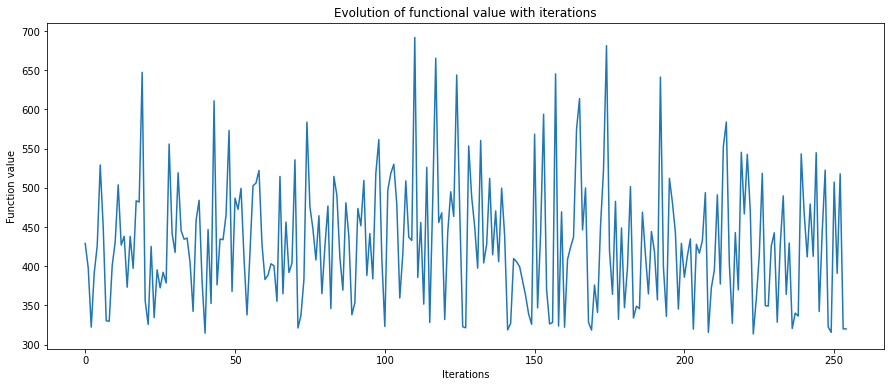

In [34]:
# How function value changes with iterations
plt.figure(figsize = (15,6))

plt.plot(iterations,func)
plt.xlabel('Iterations')
plt.ylabel('Function value')
plt.title('Evolution of functional value with iterations')

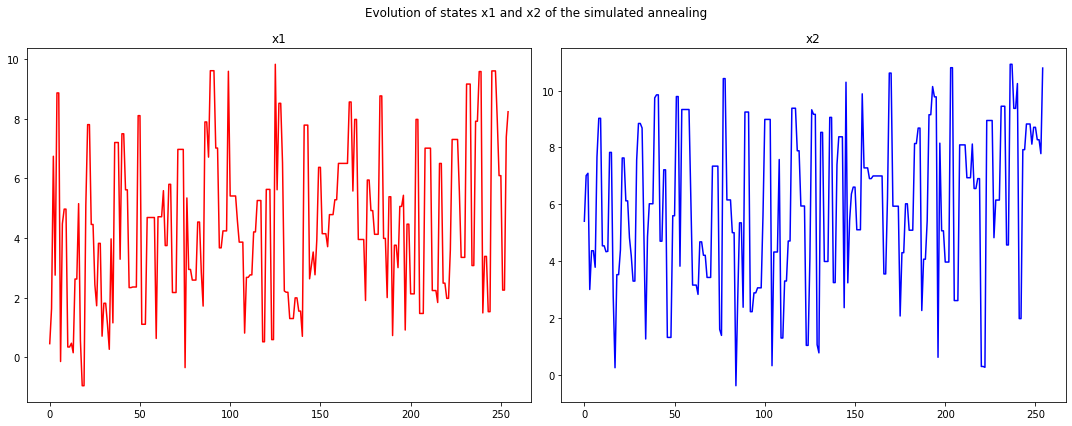

In [35]:
# Change in x1
plt.figure(figsize= (15,6))
plt.suptitle("Evolution of states x1 and x2 of the simulated annealing")
plt.subplot(121)
plt.plot(x_1, 'r')
plt.title("x1")
plt.subplot(122)
plt.plot(x_2, 'b')
plt.title("x2")
plt.tight_layout()
plt.show()

In [36]:
iterations[-1]

254